In [1]:
# !pip install tensorflow
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading data from csv file
df = pd.read_csv('./phishing_data.csv')

In [4]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [5]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [6]:
# dropping the url column and storing in a new data dataframe 'data'
data = df.drop(['url'], axis = 1)

In [7]:
data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,46,20,zero,3,zero,0,1,0,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,128,120,0,10,0,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,52,25,0,3,0,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,21,13,0,2,0,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,28,19,0,2,0,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [8]:
# printing the shape of data
data.shape

(11481, 88)

In [10]:
data.shape

In [11]:
# checking whether there is any missing value in the dataframe or not
data.isnull().values.any()

False

In [12]:
#Displaying a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11481 non-null  int64  
 1   length_hostname             11481 non-null  int64  
 2   ip                          11481 non-null  object 
 3   nb_dots                     11481 non-null  int64  
 4   nb_hyphens                  11481 non-null  object 
 5   nb_at                       11481 non-null  int64  
 6   nb_qm                       11481 non-null  int64  
 7   nb_and                      11481 non-null  int64  
 8   nb_eq                       11481 non-null  int64  
 9   nb_underscore               11481 non-null  int64  
 10  nb_tilde                    11481 non-null  int64  
 11  nb_percent                  11481 non-null  int64  
 12  nb_slash                    11481 non-null  int64  
 13  nb_star                     114

# Data type Handling

In [13]:
# filtering the rows which have data type 'object'
list_o_dtype = []
for i in data.columns:
    if data[i].dtype == 'O':
        list_o_dtype.append(i)

In [14]:
# taking the last column name out as it is dependent variable
list_o_dtype = list_o_dtype[:-1]

In [15]:
# printing the 'list_o_dtype'
list_o_dtype

['ip', 'nb_hyphens', 'domain_with_copyright']

In [17]:
# converting all the columns to 'float64' data type
# during scaling the data will get converted to decimal format
# we are not considering the last column as that is the dependent variable
# the last column (dependent variable) has to one hot encoded
for i in data.columns[:-1]:
    data = data.astype({i : 'float64'})

In [18]:
data.dtypes

length_url         float64
length_hostname    float64
ip                 float64
nb_dots            float64
nb_hyphens         float64
                    ...   
web_traffic        float64
dns_record         float64
google_index       float64
page_rank          float64
status              object
Length: 82, dtype: object

In [19]:
#Displaying a stastical summary of the dataset
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,...,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,1.148100e+04,11481.000000,11481.000000,11481.000000
mean,61.203902,21.129344,0.147809,2.496298,0.989548,0.022124,0.140928,0.168975,0.299364,0.334117,...,0.125425,0.773713,0.441599,0.074122,492.388468,4059.613884,8.630862e+05,0.019598,0.535493,3.190837
std,56.795786,10.633279,0.354926,1.421589,2.022623,0.155721,0.365781,0.871249,1.040306,1.165724,...,0.331214,0.418445,0.496599,0.261981,811.349827,3110.854830,2.000251e+06,0.138619,0.498760,2.531696
min,13.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,85.000000,966.000000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,246.000000,4003.000000,2.187000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,452.000000,7006.000000,3.733190e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,32.000000,4.000000,3.000000,19.000000,19.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12873.000000,1.076799e+07,1.000000,1.000000,10.000000


# Checking Imbalance in Dataset

In [20]:
# checking whether the dataset is balanced or not
data['status'].value_counts()

phishing      5741
legitimate    5740
Name: status, dtype: int64

# Scaling Data

In [21]:
# diving all the columns with the maximum value
# this will scale everything in between 0 and 1
for i in data.columns[:-1]:
    data[i] = data[i] / data[i].max()

In [22]:
data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,0.028032,0.093458,0.0,0.125000,0.0,0.0,0.333333,0.0,0.052632,0.0,...,1.0,1.0,0.0,0.021020,0.518760,0.007293,0.0,0.0,0.5,phishing
1,0.078001,0.560748,0.0,0.416667,0.0,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.010057,0.005049,0.000000,0.0,1.0,0.0,phishing
2,0.031688,0.116822,0.0,0.125000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.003989,0.132603,0.000000,0.0,1.0,0.0,phishing
3,0.012797,0.060748,0.0,0.083333,0.0,0.0,0.000000,0.0,0.000000,0.0,...,1.0,1.0,0.0,0.004358,0.103395,0.000000,0.0,0.0,0.0,legitimate
4,0.017063,0.088785,0.0,0.083333,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.005498,0.129107,0.028979,0.0,0.0,0.4,legitimate


# Splitting Dataset

In [23]:
# label encoding the categorical data
# in this case only the dependent variable (the last column of the datset)
y = pd.get_dummies(df['status'], prefix='type')
# dropping only 1 of the columns as only 1 column can serve our purpose
y = y.drop(['type_phishing'], axis = 1)

In [24]:
# splitting the dataset into train and test split

# taking all the columns except the last column
x = data.iloc[:, :-1]

# importing required modules from sklearn for train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
x.shape

(11481, 81)

In [26]:
y.shape

(11481, 1)

# Applying XGBoost

In [27]:
# importing XGBoost
from xgboost import XGBClassifier
# importing accuracy_score from sklearn module for testing accuracy
from sklearn.metrics import accuracy_score

In [28]:
# making object of XGBoost
xgb_model = XGBClassifier()

In [29]:
# training the model ising XGBoost
xgb_model.fit(x_train, y_train)

d:\project\data_science\data_science\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
d:\project\data_science\data_science\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[17:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
y_pred = xgb_model.predict(x_test)
predictions = [round(value) for value in y_pred]

d:\project\data_science\data_science\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [31]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.52%


In [35]:
predictions

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


# Plotting confusion matrix

In [34]:
# importing the necessary libraries for plottinf confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [36]:
cnm = confusion_matrix(y_test, predictions)

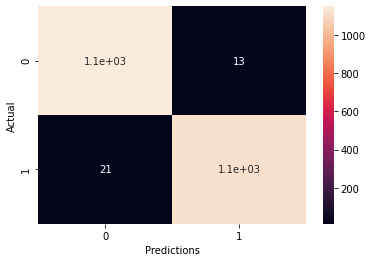

In [37]:
# using heatmap for plotting confusion matrix
sn.heatmap(cnm, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()